In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sun Mar 21 15:04:54 2021

Code for decision variables
"""

import numpy as np
import matplotlib.pyplot as plt

class DecisionModel():
    def __init__(self, x = 0, w = 1, wd = 1, ws = 1):
        self.x = x
        self.x1 = x
        self.x2 = x
        
        self.w = w
        
        self.wd = wd
        
        
        self.ws = ws
        
        self.threshold = 0.2
        
        self.dt = 0.01
        self.outcomes = ['Right', 'Left', 'Center']

        
    def DDMmodel(self, Q):
        
        q1 = Q[0]
        q2 = Q[1]

        dx = self.w * (q1 - q2) * self.dt +  np.random.normal(loc=0.0, scale=0.01)
        
        self.x = self.x + dx
        
        decision = 'None'
        if self.x >= self.threshold:
            decision = 'Right'
        if self.x <= -self.threshold:
            decision = 'Left'
        # if self.x > -self.threshold and self.x < self.threshold:
        #     decision = 'None'
        return self.x, decision
    
    def RacingModel(self, v0, Q):
        
        q1 = Q[0]
        q2 = Q[1]

        dx1 = (v0 + self.w * q1) * self.dt +  np.random.normal(loc=0.0, scale=0.01)
        dx2 = (v0 + self.w * q2) * self.dt +  np.random.normal(loc=0.0, scale=0.01)
        
        self.x1 = self.x1 + dx1
        self.x2 = self.x2 + dx2
        
        if self.x1 >= self.threshold and self.x2 <= self.threshold:
            decision = 'Right'
        if self.x2 >= self.threshold and self.x1 <= self.threshold:
            decision = 'Left'
        if self.x1 <= self.threshold and self.x2 <= self.threshold:
            decision = 'None'
        
        # should write something for conflict resolution
        if self.x1 >= self.threshold and self.x2 >= self.threshold:
            flag = np.random.randint(2)
            if flag == 0:
                decision = 'Right'
            else:
                decision = 'Left'
            
        return self.x1, self.x2, decision
    
    def AdvRacingModel(self, v0, Q):
        
        q1 = Q[0]
        q2 = Q[1]

        dx1 = (v0 + self.wd * (q1 - q2) + self.ws * (q1 + q2)) * self.dt +  np.random.normal(loc=0.0, scale=0.01)
        dx2 = (v0 + self.wd * (q2 - q1) + self.ws * (q1 + q2)) * self.dt +  np.random.normal(loc=0.0, scale=0.01)
        self.x1 = self.x1 + dx1
        self.x2 = self.x2 + dx2
        if self.x1 >= self.threshold and self.x2 <= self.threshold:
            decision = 'Right'
        if self.x2 >= self.threshold and self.x1 <= self.threshold:
            decision = 'Left'
        if self.x1 <= self.threshold and self.x2 <= self.threshold:
            decision = 'None'
        
        # should write something for conflict resolution
        if self.x1 >= self.threshold and self.x2 >= self.threshold:
            flag = np.random.randint(2)
            if flag == 0:
                decision = 'Right'
            else:
                decision = 'Left'
            
        return self.x1, self.x2, decision
  
    def MA_AdvRacingModel(self, v0, Q, combination_pair):
        
        q1 = Q[0]
        q2 = Q[1]

        dx1 = (v0 + self.wd * (q1 - q2) + self.ws * (q1 + q2)) * self.dt +  np.random.normal(loc=0.0, scale=0.01)
        dx2 = (v0 + self.wd * (q2 - q1) + self.ws * (q1 + q2)) * self.dt +  np.random.normal(loc=0.0, scale=0.01)
        self.x1 = self.x1 + dx1
        self.x2 = self.x2 + dx2
        if self.x1 >= self.threshold and self.x2 <= self.threshold:
            decision = self.outcomes[combination_pair[0]]
        if self.x2 >= self.threshold and self.x1 <= self.threshold:
            decision = self.outcomes[combination_pair[1]]
        if self.x1 <= self.threshold and self.x2 <= self.threshold:
            decision = 'None'
        
        # should write something for conflict resolution
        if self.x1 >= self.threshold and self.x2 >= self.threshold:
            flag = np.random.randint(2)
            if flag == 0:
                decision = self.outcomes[combination_pair[0]]
            else:
                decision = self.outcomes[combination_pair[1]]
            
        return self.x1, self.x2, decision

    def updateQvals(self, Q, reward, alpha, decision):
        if decision == 'Right':
            Q[0] = Q[0] + alpha * (reward - Q[0])
        if decision == 'Left':
            Q[1] = Q[1] + alpha * (reward - Q[1])
        if decision == 'Center':
            Q[2] = Q[2] + alpha * (reward - Q[2])
        return Q
    
def TaskProcess(decision):
    prob_status = np.random.uniform()
    if decision == 'Right':
        if prob_status <= 0.8:
            reward = 100
        else:
            reward = 0
    if decision == 'Left':
        if prob_status <= 0.5:
            reward = 100
        else:
            reward = 0
    if decision == 'Center':
        if prob_status <= 0.1:
            reward = 100
        else:
            reward = 0
    
    if decision == 'None':
        reward = 0   
    return reward
    


In [105]:

task_dur = 2.5 # time in seconds
ds = 0.01 # sampling time
time_steps = np.linspace(0, int(task_dur/ds - 1), int(task_dur/ds))
total_trials = 100
trials = 0

Q_init = np.zeros(2)
Q_cur = Q_init

num_rights = 0
num_lefts = 0
output = []
combinations = [[0, 1], [0, 2], [1, 2]]

while trials < total_trials:
    x = 0
    w = 1
    wd = 1
    ws = 1
    alpha = 0.001
    
    #Q_init = np.zeros((2,1))
    #Q_cur = Q_init
    pair_models = []
    for i in range(len(combinations)) :
        pair_models.append(DecisionModel(x, w, wd, ws))
    decision_ins = DecisionModel(x, w, wd, ws)
    total_x = np.zeros((1,2))
    decision = 'None'

    for t in time_steps:

        ### WIN-ALL
        for i in range(len(combinations)) :
            dm = pair_models[i]
            x1, x2, decision = dm.MA_AdvRacingModel(x, Q_cur, combinations[i])
            
            reward = TaskProcess(decision)



        # Take decision
        x1, x2, decision = decision_ins.AdvRacingModel(x, Q_cur)

        # Obtain reward
        reward = TaskProcess(decision)
        total_x = np.append(total_x, [[x1, x2]], axis=0)
        if decision == 'Right' or decision == 'Left':
            # Update the Q-values with reward
            Q_cur = decision_ins.updateQvals(Q_cur, reward, alpha, decision)
            #Q_cur = decision_ins.updateQvals(Q_cur, reward, alpha)

            break
    if trials == 0:
        first = total_x.T
    elif trials == total_trials//2 :
        mid = total_x.T
    elif trials == total_trials-1 :
        last = total_x.T
    # print(decision_ins.x)
    # print(decision)
    # print(reward)
    # print(Q_cur)
    # print(total_x[10])
    if decision == 'Right':
        num_rights += 1
    else:
        num_lefts += 1


    # Update the Q-values with reward




    trials += 1

AttributeError: 'DecisionModel' object has no attribute 'MA_AdvRacingModel'

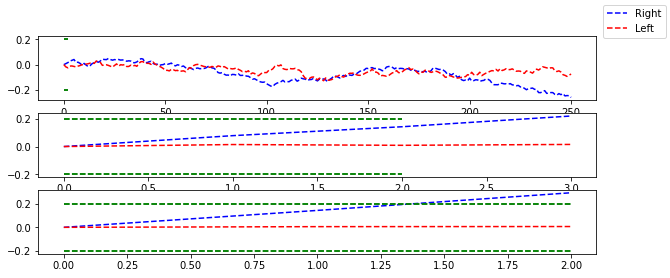

In [104]:
fig, axs = plt.subplots(3, 1, figsize=(10,4))
for i in range(3) :
    if i == 0:
        output = first
    elif i == 1 :
        output = mid
    elif i == 2 :
        output = last
    ax = axs[i]
    r = ax.plot(output[0], '--b', label='Right')[0]
    l = ax.plot(output[1], '--r', label='Left')[0]
    ax.plot(0.2 + total_x * 0, '--g')
    ax.plot(-0.2 + total_x * 0, '--g')
fig.legend([r, l], ['Right', 'Left'])


In [188]:
class Accumulator():
    def __init__(self, src, tar, x = 0, w = 1, wd = 1, ws = 1):
        self.source = src
        self.target = tar
        self.x = x
        self.x_acc = []
        self.w = w
        self.wd = wd
        self.ws = ws
        self.threshold = 0.2
        self.dt = 0.01
        self.v0 = 0.001
        self.reached = False

        
    def run(self, Q):
        
        q1 = Q[self.source]
        q2 = Q[self.target]

        dx = (self.v0 + self.wd * (q1 - q2) + self.ws * (q1 + q2)) * self.dt +  np.random.normal(loc=0.0, scale=0.01)
        self.x = self.x + dx
        self.x_acc.append(self.x)
        if self.x >= self.threshold:
            self.reached = True
        return self.x

def WinAll(accs) :
    for src in accs:
        src_reached = accs[src]["reached"]
        for othr_src in accs:
            if othr_src == src: continue
            if src_reached == 2 and accs[othr_src]["reached"] < 2 :
                return src
    print("Returning random")
    return np.random.randint(2)

def TaskProcess(decision):
    prob_status = np.random.uniform()
    if decision == 0:
        if prob_status <= 0.8:
            reward = 100
        else:
            reward = 0
    if decision == 1:
        if prob_status <= 0.7:
            reward = 100
        else:
            reward = 0
    if decision == 2:
        if prob_status <= 0.1:
            reward = 100
        else:
            reward = 0
    return reward

def updateQvals(Q, reward, alpha, decision):
    Q[decision] = Q[decision] + alpha * (reward - Q[decision])
    return Q

def plotDecisions(combinations, accs, trial):
    fig, axs = plt.subplots(len(combinations), 1, figsize=(10,4))
    fig.suptitle("Trial %s"%trial)
    for i in range(len(combinations)) :
        combi = combinations[i]
        ax = axs[i]
        ax.plot(accs[combi[0]]["others"][combi[1]].x_acc, '--b', label=str(combi[0])+'_'+str(combi[1]))[0]
        ax.plot(accs[combi[1]]["others"][combi[0]].x_acc, '--r', label=str(combi[1])+'_'+str(combi[0]))[0]
        ax.plot(0.2 + total_x * 0, '--g')
        ax.plot(-0.2 + total_x * 0, '--g')
        ax.legend(loc='upper right')


Returning random
Decision ::  1
Decision ::  0
Decision ::  1
Decision ::  1
Decision ::  1
Decision ::  1
Decision ::  1
Decision ::  1
Decision ::  1
Decision ::  0
Decision ::  0
Decision ::  0
Decision ::  0
Decision ::  0
Decision ::  0
Returning random
Decision ::  0
Decision ::  0
Decision ::  0
Decision ::  0
Decision ::  0


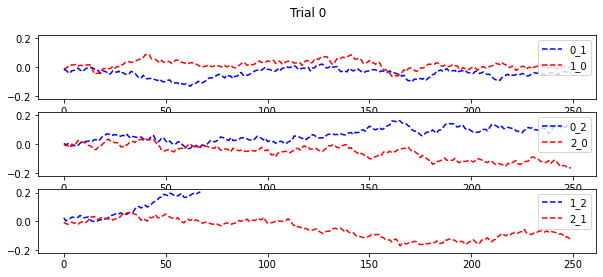

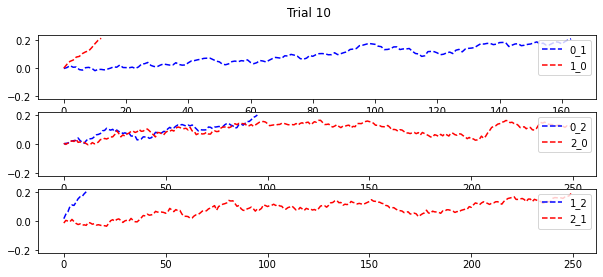

In [189]:
task_dur = 2.5 # time in seconds
ds = 0.01 # sampling time
time_steps = np.linspace(0, int(task_dur/ds - 1), int(task_dur/ds))
total_trials = 20
trials = 0

Q_init = np.zeros(3)
Q_curr = Q_init

combinations = [[0, 1], [0, 2], [1, 2]]
opts = np.array([0, 1, 2])
alpha = 0.001

while trials < total_trials:
    accs = {}
    for opt in opts:
        accs[opt] = {"others": {}, "reached": 0}
        for i in opts[opts != opt]:
            accs[opt]["others"][i] = Accumulator(opt, i) 
    alpha = 0.001
    for t in time_steps:
        for src in accs:
            for tar in accs[src]["others"] :
                acc = accs[src]["others"][tar]
                if not acc.reached : 
                    acc.run(Q_curr)
                    if acc.reached :
                        accs[src]["reached"] += 1
    decision = WinAll(accs)
    print('Decision :: ', decision)
    reward = TaskProcess(decision)
    Q_curr = updateQvals(Q_curr, reward, alpha, decision)
    if(trials == 0 or trials == 10):
        plotDecisions(combinations, accs, trials)
    trials += 1

 - Session performances - decisions
 - Observe reaction times, learning rate, reward magnitude, V0
 - Task contingencies - easy, mid, difficult